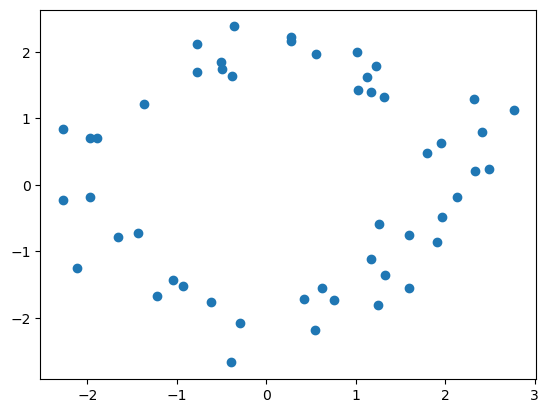

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noisy_circle_points(r, n_points, noise_variance):
    angles = np.random.uniform(0, 2 * np.pi, n_points)
    noise = np.random.normal(0, np.sqrt(noise_variance), (n_points, 2))

    x = r * np.cos(angles) + noise[:, 0]
    y = r * np.sin(angles) + noise[:, 1]

    return x, y

# Parameter
radius = 2
n_points = 50
noise_variance = 0.1

x, y = generate_noisy_circle_points(radius, n_points, noise_variance)

plt.scatter(x, y)
plt.show()


In [2]:
def gradient_E(x, y, mx, my, r):
    n = len(x)
    grad_mx = 0
    grad_my = 0
    grad_r = 0

    for i in range(n):
        dist = np.sqrt((x[i] - mx)**2 + (y[i] - my)**2)
        error = dist - r

        if dist != 0:
            grad_mx += 2 * error * (-(x[i] - mx) / dist)
            grad_my += 2 * error * (-(y[i] - my) / dist)
        grad_r += 2 * error * (-1)

    return grad_mx, grad_my, grad_r

In [3]:
def gradient_descent_E(start, learning_rate, iterations): 
    current_mx, current_my, current_r = start
    trajectory = [start]
    for _ in range(iterations):
        grad_mx_val, grad_my_val, grad_r_val = gradient_E(x, y, current_mx, current_my, current_r)
        
        current_mx -= learning_rate * grad_mx_val
        current_my -= learning_rate * grad_my_val
        current_r -= learning_rate * grad_r_val
        
        trajectory.append((current_mx, current_my, current_r))

    return current_mx, current_my, current_r, trajectory

min_mx, min_my, min_r, trajectory = gradient_descent_E((0.5, 0.1, 0.9), 0.005, 3)
min_mx, min_my, min_r

(np.float64(0.2786123486704862),
 np.float64(0.0871499518547585),
 np.float64(1.8806125506568088))

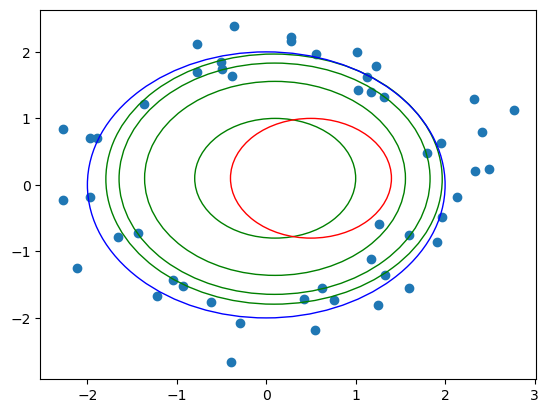

In [4]:
def visualize(start, trajectory, step):
    plt.scatter(x, y)
    c_orig = plt.Circle((0, 0), 2, color="b", fill=False)
    c_start = plt.Circle((start[0], start[1]), start[2], color="r", fill=False)
    for i in range(0, len(trajectory), step):
        c_tmp = plt.Circle((trajectory[i][1], trajectory[i][1]), trajectory[i][2], color="g", fill=False)
        plt.gca().add_patch(c_tmp)
    plt.gca().add_patch(c_orig)
    plt.gca().add_patch(c_start)
    plt.show()

visualize((0.5, 0.1, 0.9), trajectory, 1)

In [5]:
#TODO: implement visualization of error history